In [3]:
# SVM Classification
import pandas as pd
import numpy as np

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [4]:
filename = 'pima-indians-diabetes.data (2).csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]


In [5]:
dataframe.head(6)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [6]:
dataframe["class"].value_counts()

0    500
1    268
Name: class, dtype: int64

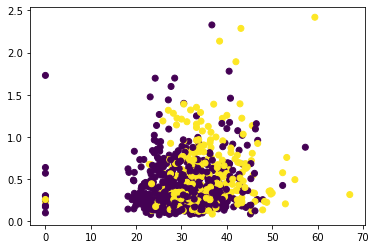

In [7]:
import matplotlib.pyplot as plt
plt.scatter(dataframe["mass"],dataframe["pedi"],c=dataframe["class"])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3,random_state=15)

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((537, 8), (537,), (231, 8), (231,))

In [11]:
clf = SVC(kernel="linear",gamma=0.0001)

clf.fit(X_train , y_train)

y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred) * 100

print("Accuracy =", acc)

confusion_matrix(y_test, y_pred)

Accuracy = 75.75757575757575


array([[135,  25],
       [ 31,  40]])

### Grid Search CV

In [26]:
clf = SVC()
param_grid = [{'kernel':["rbf"],'gamma':[50,5,10,0.5,1,0.001,0.0001,0.00001],'C':[1,15,14,13,12,11,10,0.1] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X_train,y_train)



GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [1, 15, 14, 13, 12, 11, 10, 0.1],
                          'gamma': [50, 5, 10, 0.5, 1, 0.001, 0.0001, 1e-05],
                          'kernel': ['rbf']}])

In [27]:
gsv.best_params_ , gsv.best_score_ 

({'C': 14, 'gamma': 1e-05, 'kernel': 'rbf'}, 0.756114605171209)

In [12]:
clf = SVC(C= 14, gamma = 0.00001,kernel="rbf")
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 77.05627705627705


array([[139,  21],
       [ 32,  39]])

In [13]:
clf = SVC(C= 1, gamma = 100,kernel="rbf")
clf.fit(X_train , y_train)
y_pred_train= clf.predict(X_train)
acc = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", acc)


Accuracy = 100.0


In [14]:
y_pred_test= clf.predict(X_test)
acc = accuracy_score(y_test, y_pred_test) * 100
print("Accuracy =", acc)


Accuracy = 69.26406926406926
